#Need to filter out matchups still!!

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

- pID: pitcher ID
- bID: batter ID
- AB: number of At Bats
- PA: number of Plate Appearances
- H: number of Hits
- SLUG: slugging value (H + 2*2B + 3*3B + 4*HR)
- W: number of Walks
- SO: number of Strike Outs
- SAC: number of Sac Flies and Sac Bunts

In [2]:
matchup_df = pd.read_json("data/matchups_2004.json")
matchup_df.head()

,AB,H,PA,RL,SAC,SO,TB,W,bID,pID
0,5,1,5,R,0,2,1,0,torrc001,medlk001
1,3,0,3,L,1,2,0,0,kinnm002,leita001
2,4,1,4,R,0,2,1,0,valee002,ayall001
3,7,0,7,R,0,4,0,0,valee002,beckj002
4,3,2,6,R,0,0,2,3,valee002,bumpn001


In [3]:
batter_sums = matchup_df.groupby('bID').sum() #by-batter totals for H, AB, etc.
batter_matchups = matchup_df.groupby('bID')['AB'].count() #Number of pitchers seen by each player

In [4]:
batter_sums.head()

,AB,H,PA,SAC,SO,TB,W
bID,,,,,,,
abada001,7,1,8,0,1,1,1
abbop001,4,0,4,0,1,0,0
aberb001,621,148,664,9,70,231,43
aberr001,145,45,153,1,30,84,8
abreb001,7568,2193,8980,74,1659,4418,1412


In [42]:
pitcher_sums=matchup_df.groupby('pID').sum()
pitcher_matchups = matchup_df.groupby('pID')['AB'].count()

In [6]:
pitcher_sums.head()

,AB,H,PA,SAC,SO,TB,W
pID,,,,,,,
aardd001,564,131,662,11,142,261,98
aased001,27,6,33,1,5,10,6
abadf001,259,70,282,1,51,116,23
abbog001,10,1,12,0,0,1,2
abboj001,1225,364,1352,20,132,662,127


In [7]:
#Gives the overall average and OBP of batters
batter_sums['AVG'] = batter_sums['H']/batter_sums['AB']
batter_sums['OBP'] = (batter_sums['H'] + batter_sums['W'])/batter_sums['PA']


In [45]:
#Gives the overall strike out, walk and hit percentage of pitchers
pitcher_sums['SO_PCT'] = pitcher_sums['SO']/pitcher_sums['PA']
pitcher_sums['W_PCT'] = pitcher_sums['W']/pitcher_sums['PA']
pitcher_sums['H_PCT'] = pitcher_sums['H']/pitcher_sums['PA']
pitcher_sums['AVG'] = pitcher_sums['H']/pitcher_sums['AB']
pitcher_sums['OBP'] = pitcher_sums['W_PCT']+pitcher_sums['H_PCT']


In [9]:
#Finding the mean and median overall pitching strike out percentage from this data
mean_avg = pitcher_sums['SO_PCT'].mean()
med_avg = pitcher_sums['SO_PCT'].median()
print "Mean Strike Out Percentage: %0.3f" % mean_avg
print "Median Strike Out Percentage: %0.3f" % med_avg

Mean Strike Out Percentage: 0.155
Median Strike Out Percentage: 0.150


In [10]:
#Finding the mean and median overall batting average from this data
mean_avg = batter_sums['AVG'].mean()
med_avg = batter_sums['AVG'].median()
print "Mean Batting Average: %0.3f" % mean_avg
print "Median Batting Average: %0.3f" % med_avg

Mean Batting Average: 0.220
Median Batting Average: 0.246


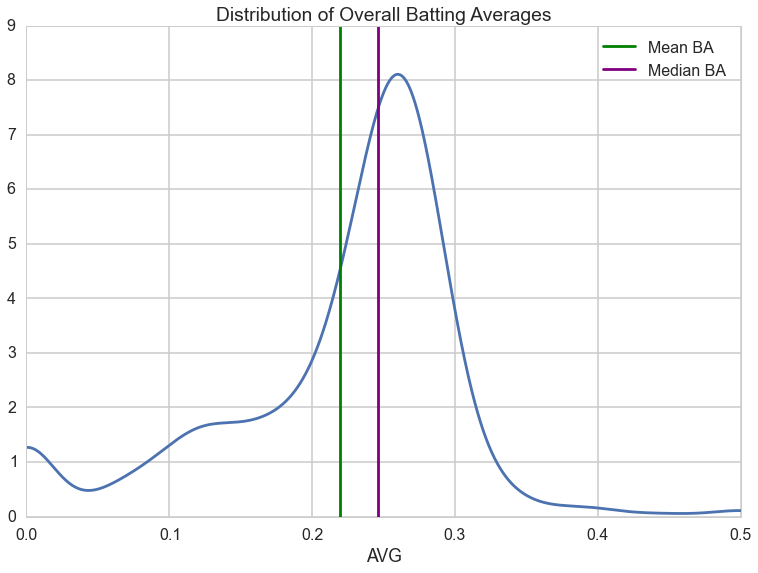

In [11]:
kde = stats.gaussian_kde(batter_sums['AVG'])
x = np.linspace(0, .5, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Overall Batting Averages")
plt.xlabel("AVG")
plt.axvline(mean_avg, 0, 10, color='g', label="Mean BA")
plt.axvline(med_avg, 0, 10, color='purple', label="Median BA")
plt.legend()

In [12]:
#Finding the mean and median overall on base percentage from this data
mean_obp = batter_sums['OBP'].mean()
med_obp = batter_sums['OBP'].median()
print "Mean On-Base Percentage: %0.3f" % mean_obp
print "Median On-Base Percentage: %0.3f" % med_obp

Mean On-Base Percentage: 0.277
Median On-Base Percentage: 0.307


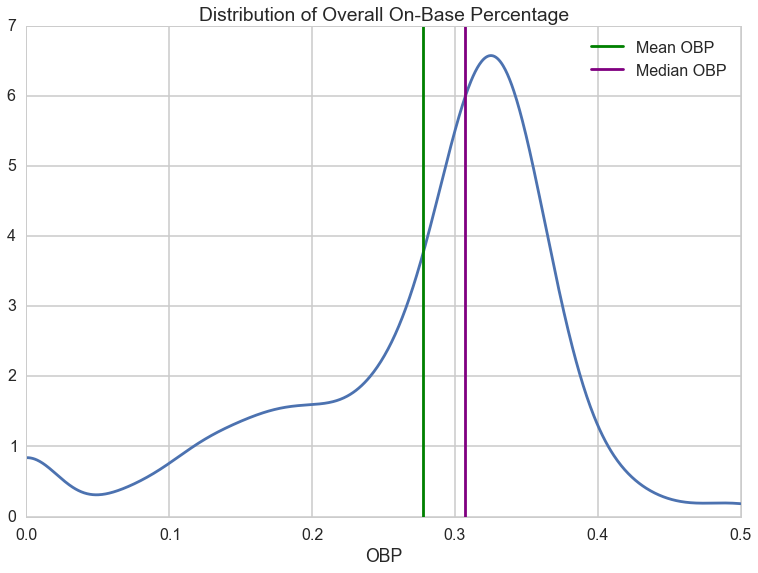

In [14]:
kde = stats.gaussian_kde(batter_sums['OBP'])
x = np.linspace(0, .5, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Overall On-Base Percentage")
plt.xlabel("OBP")
plt.axvline(mean_obp, 0, 10, color='g', label="Mean OBP")
plt.axvline(med_obp, 0, 10, color='purple', label="Median OBP")
plt.legend()

In [43]:
#Distribution of batter matchups - the number of pitchers each batter has faced
mean_matchups = batter_matchups.mean()
med_matchups = batter_matchups.median()
print "Mean Number of Matchups: %0.1f" % mean_matchups
print "Median Number of Matchups: %0.1f" % med_matchups

Mean Number of Matchups: 133.3
Median Number of Matchups: 45.5


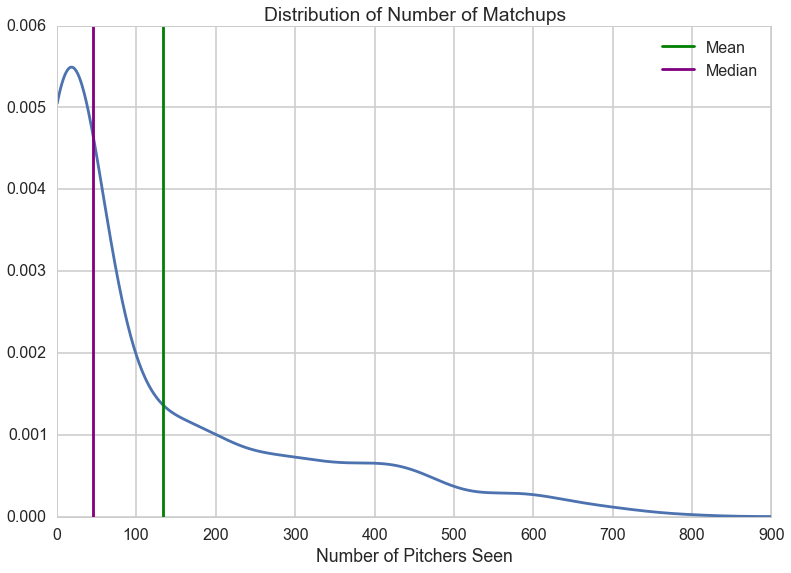

In [41]:
kde = stats.gaussian_kde(batter_matchups)
x = np.linspace(0, 900, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Number of Pitchers Seen")
plt.xlabel("Number of Pitchers Seen")
plt.axvline(mean_matchups, 0, 10, color='g', label="Mean")
plt.axvline(med_matchups, 0, 10, color='purple', label="Median")
plt.legend()

In [17]:
#Do distributions for each batter-pitcher matchup as well
matchup_df['AVG'] = matchup_df['H']/matchup_df['AB']
matchup_df['OBP'] = (matchup_df['H'] + matchup_df['W'])/matchup_df['PA']

In [18]:
#Finding the mean and median overall batting average for all matchups
m_mean_avg = matchup_df['AVG'].mean()
m_med_avg = matchup_df['AVG'].median()
print "Mean Batting Average: %0.3f" % m_mean_avg
print "Median Batting Average: %0.3f" % m_med_avg

Mean Batting Average: 0.264
Median Batting Average: 0.250


In [17]:
#kde = stats.gaussian_kde(matchup_df['AVG'])
#x = np.linspace(0, .5, 1000)
#plt.plot(x, kde(x))
#plt.title("Distribution of Matchup Batting Averages")
#plt.xlabel("AVG")
#plt.axvline(mean_avg, 0, 10, color='g', label="Mean BA")
#plt.axvline(med_avg, 0, 10, color='purple', label="Median BA")
#plt.legend()

#Creating New DataFrame

In [46]:
#Here I just saved the series of overall averages and OBP for the batters
#This will have to be re-done once we narrow the dataframe down a bit
overall_batter_avg  = batter_sums['AVG']
overall_batter_obp  = batter_sums['OBP']
overall_batter_pa   = batter_sums['PA']
overall_batter_ab   = batter_sums['AB']
overall_batter_h    = batter_sums['H']
overall_batter_w    = batter_sums['W']
overall_batter_tb   = batter_sums['TB']
overall_batter_sac  = batter_sums['SAC']
overall_batter_faced = batter_matchups

overall_pitcher_spct= pitcher_sums['SO_PCT']
overall_pitcher_wpct= pitcher_sums['W_PCT']
overall_pitcher_hpct= pitcher_sums['H_PCT']
overall_pitcher_avg = pitcher_sums['AVG']
overall_pitcher_obp = pitcher_sums['OBP']
overall_pitcher_so  = pitcher_sums['SO']
overall_pitcher_ab  = pitcher_sums['AB']
overall_pitcher_h   = pitcher_sums['H']
overall_pitcher_w   = pitcher_sums['W']
overall_pitcher_tb  = pitcher_sums['TB']
overall_pitcher_sac = pitcher_sums['SAC']
overall_pitcher_pa = pitcher_sums['PA']
overall_pitcher_faced = pitcher_matchups

In [47]:
#dataframe of just the overall batting average for each batter
df1 = pd.DataFrame(overall_batter_avg).reset_index()
df1.rename(columns={'AVG': 'ov_AVG'}, inplace=True)
#dataframe of just the overall OBP for each batter
df2 = pd.DataFrame(overall_batter_obp).reset_index()
df2.rename(columns={'OBP': 'ov_OBP'}, inplace=True)
#dataframe of just the overall PA for each batter
df3 = pd.DataFrame(overall_batter_pa).reset_index()
df3.rename(columns={'PA': 'ov_PA'}, inplace=True)
#dataframe of just the overall AB for each batter
df4 = pd.DataFrame(overall_batter_ab).reset_index()
df4.rename(columns={'AB': 'ov_AB'}, inplace=True)
#dataframe of just the overall H for each batter
df5 = pd.DataFrame(overall_batter_h).reset_index()
df5.rename(columns={'H': 'ov_H'}, inplace=True)
#dataframe of just the overall W for each batter
df6 = pd.DataFrame(overall_batter_w).reset_index()
df6.rename(columns={'W': 'ov_W'}, inplace=True)
#dataframe of just the overall TB for each batter
df7 = pd.DataFrame(overall_batter_tb).reset_index()
df7.rename(columns={'TB': 'ov_TB'}, inplace=True)
#dataframe of just the overall SAC for each batter
df8 = pd.DataFrame(overall_batter_sac).reset_index()
df8.rename(columns={'SAC': 'ov_SAC'}, inplace=True)

#dataframe of just the overall SO_PCT for each pitcher
df9 = pd.DataFrame(overall_pitcher_spct).reset_index()
df9.rename(columns={'SO_PCT': 'ovp_SO_PCT'}, inplace=True)
#dataframe of just the overall W_PCT for each pitcher
df10 = pd.DataFrame(overall_pitcher_wpct).reset_index()
df10.rename(columns={'W_PCT': 'ovp_W_PCT'}, inplace=True)
#dataframe of just the overall H_PCT for each pitcher
df11 = pd.DataFrame(overall_pitcher_hpct).reset_index()
df11.rename(columns={'H_PCT': 'ovp_H_PCT'}, inplace=True)
#dataframe of just the overall SAC for each pitcher
df12 = pd.DataFrame(overall_pitcher_sac).reset_index()
df12.rename(columns={'SAC': 'ovp_SAC'}, inplace=True)
#dataframe of just the overall SO for each pitcher
df13 = pd.DataFrame(overall_pitcher_so).reset_index()
df13.rename(columns={'SO': 'ovp_SO'}, inplace=True)
#dataframe of just the overall AB for each pitcher
df14 = pd.DataFrame(overall_pitcher_ab).reset_index()
df14.rename(columns={'AB': 'ovp_AB'}, inplace=True)
#dataframe of just the overall H for each pitcher
df15 = pd.DataFrame(overall_pitcher_h).reset_index()
df15.rename(columns={'H': 'ovp_H'}, inplace=True)
#dataframe of just the overall W for each pitcher
df16 = pd.DataFrame(overall_pitcher_w).reset_index()
df16.rename(columns={'W': 'ovp_W'}, inplace=True)
#dataframe of just the overall TB for each pitcher
df17 = pd.DataFrame(overall_pitcher_tb).reset_index()
df17.rename(columns={'TB': 'ovp_TB'}, inplace=True)
#dataframe of just the overall PA for each pitcher
df18 = pd.DataFrame(overall_pitcher_pa).reset_index()
df18.rename(columns={'PA': 'ovp_PA'}, inplace=True)
#dataframe of just the overall AVG for each pitcher
df19 = pd.DataFrame(overall_pitcher_avg).reset_index()
df19.rename(columns={'AVG': 'ovp_AVG'}, inplace=True)
#dataframe of just the overall OBP for each pitcher
df20 = pd.DataFrame(overall_pitcher_obp).reset_index()
df20.rename(columns={'OBP': 'ovp_OBP'}, inplace=True)

In [48]:
for df in [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11,
          df12, df13, df14, df15, df16, df17, df18, df19, df20]:
    new_matchup_tempdf = matchup_df.merge(df, how='left')
#new_matchup_df[new_matchup_df.pID=='medk001']

In [49]:
#checking that overall pitcher stats stay constant over all matchups
new_matchup_df[new_matchup_df.pID=='leita001']

,AB,H,PA,RL,SAC,SO,TB,W,bID,pID,AVG,OBP,ov_AVG,ov_OBP,ov_PA,ov_AB,ov_H,ov_W,ov_TB,ov_SAC,ovp_SO_PCT,ovp_W_PCT,ovp_H_PCT,ovp_SAC,ovp_SO,ovp_AB,ovp_H,ovp_W,ovp_TB,ovp_PA,ovp_AVG,ovp_OBP
1,3,0,3,L,1,2,0,0,kinnm002,leita001,0.000000,0.000000,0.000000,0.000000,3,3,0,0,0,1,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
966,17,5,18,L,1,5,7,1,bergp001,leita001,0.294118,0.333333,0.225515,0.305202,865,776,175,89,296,18,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
1179,13,1,17,L,0,1,1,4,gutir001,leita001,0.076923,0.294118,0.263979,0.339942,3430,3076,812,354,1260,75,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
1904,21,10,22,L,0,3,14,1,palmr001,leita001,0.476190,0.500000,0.288438,0.381008,11215,9756,2814,1459,6125,123,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
2568,7,3,8,L,0,0,3,1,wilsj002,leita001,0.428571,0.500000,0.266095,0.309535,4342,4085,1087,257,1772,116,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
3065,12,1,13,L,0,2,1,1,durhr001,leita001,0.083333,0.153846,0.278052,0.355404,7476,6675,1856,801,3571,103,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
3935,9,3,10,L,0,2,7,1,colbg001,leita001,0.333333,0.400000,0.282270,0.333918,2279,2115,597,164,1146,18,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
4376,12,2,14,L,0,2,4,2,ventr001,leita001,0.166667,0.285714,0.270859,0.376224,7453,6376,1727,1077,3419,100,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
5615,22,9,24,L,0,2,15,2,ramim002,leita001,0.409091,0.458333,0.310247,0.421442,8796,7378,2289,1418,5258,86,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069
6033,7,2,8,L,0,0,4,1,spivj001,leita001,0.285714,0.375000,0.273381,0.359746,1262,1112,304,150,591,15,0.177112,0.131925,0.218144,91,1023,5014,1260,762,2335,5776,0.251296,0.350069


In [40]:
new_matchup_df.to_csv("temp_matchupdf.csv", index=False)